In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
arr = np.load('perfmat1461944084.npy')

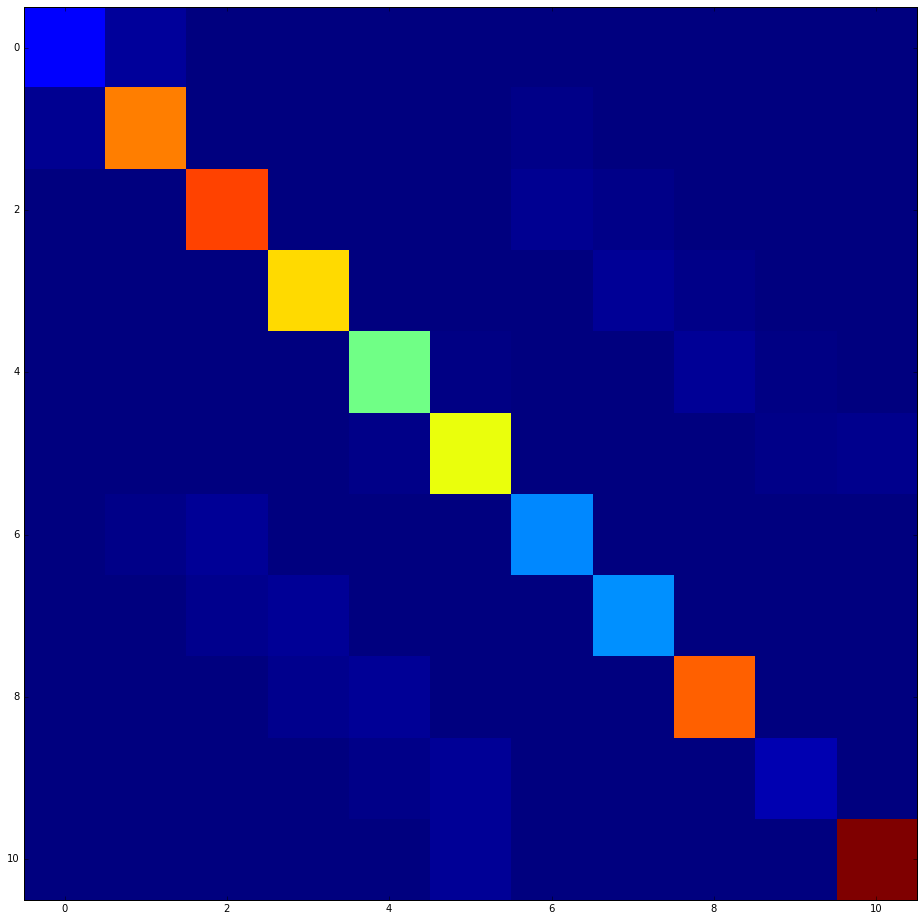

In [3]:
fig = plt.figure(figsize=(16,16))
plt.imshow(arr, cmap=plt.get_cmap('jet'), interpolation='nearest')
#fig.savefig('zseg_mat_1461944084.pdf')

In [4]:
arr_tracks = np.load('tracks_with_cuts_updated.npy')

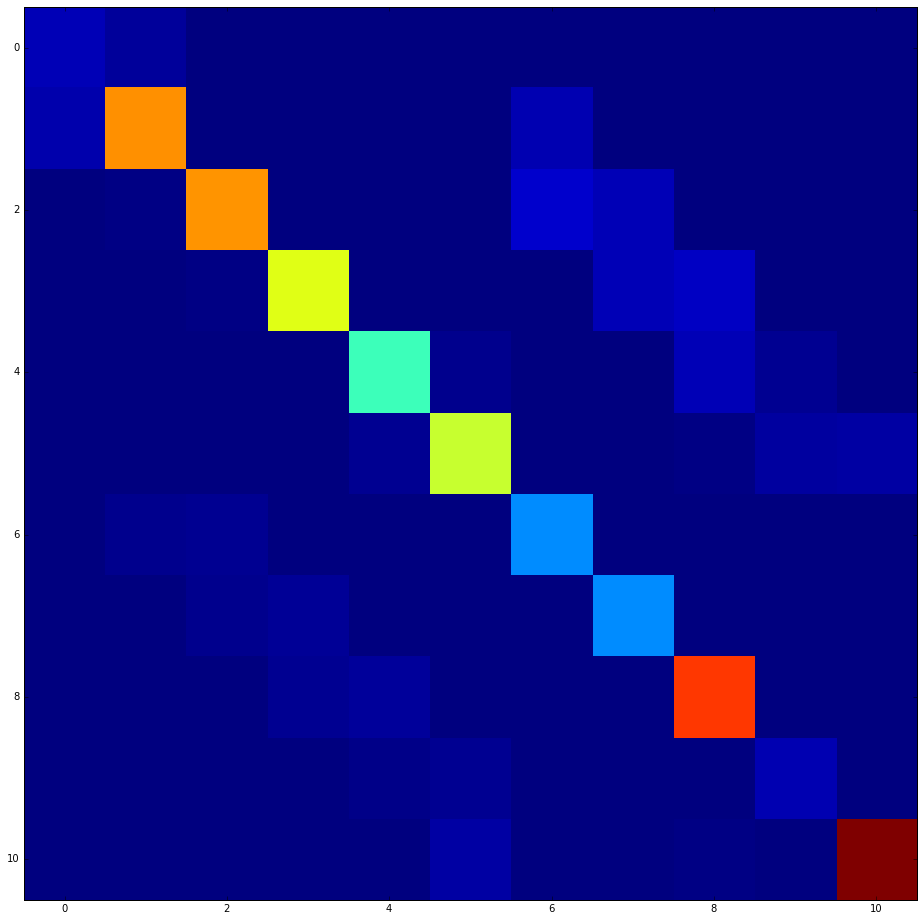

In [5]:
fig = plt.figure(figsize=(16,16))
plt.imshow(arr_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest')
#fig.savefig('zseg_mat_1461944084.pdf')

We row normalize (divide by `axis=1` to get the _purity_ - it is saying "okay, I reconstructed an event in target 1, did it really come from target 1?, etc."

In [9]:
pur = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    pur[i, :] = arr[i, :] / arr.sum(axis=1)[i]
    
pur_tracks = np.zeros_like(arr_tracks)
for i in range(np.shape(arr_tracks)[0]):
    pur_tracks[i, :] = arr_tracks[i, :] / arr_tracks.sum(axis=1)[i]

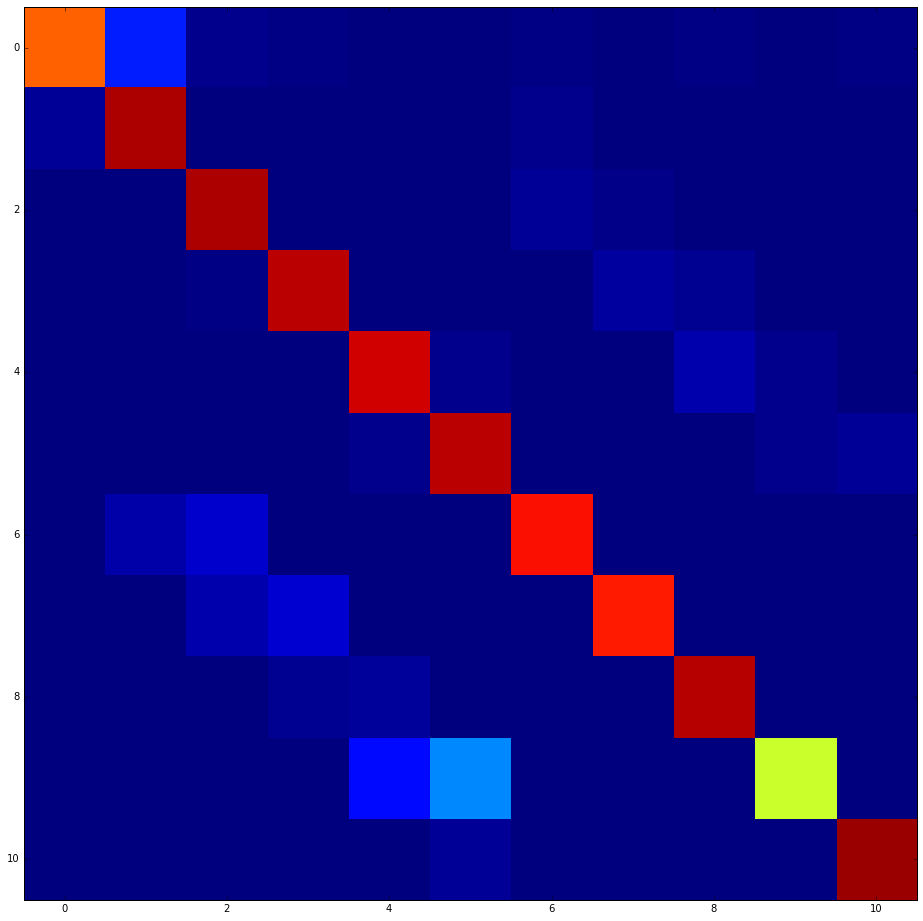

In [10]:
fig = plt.figure(figsize=(16,16))
plt.imshow(pur, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

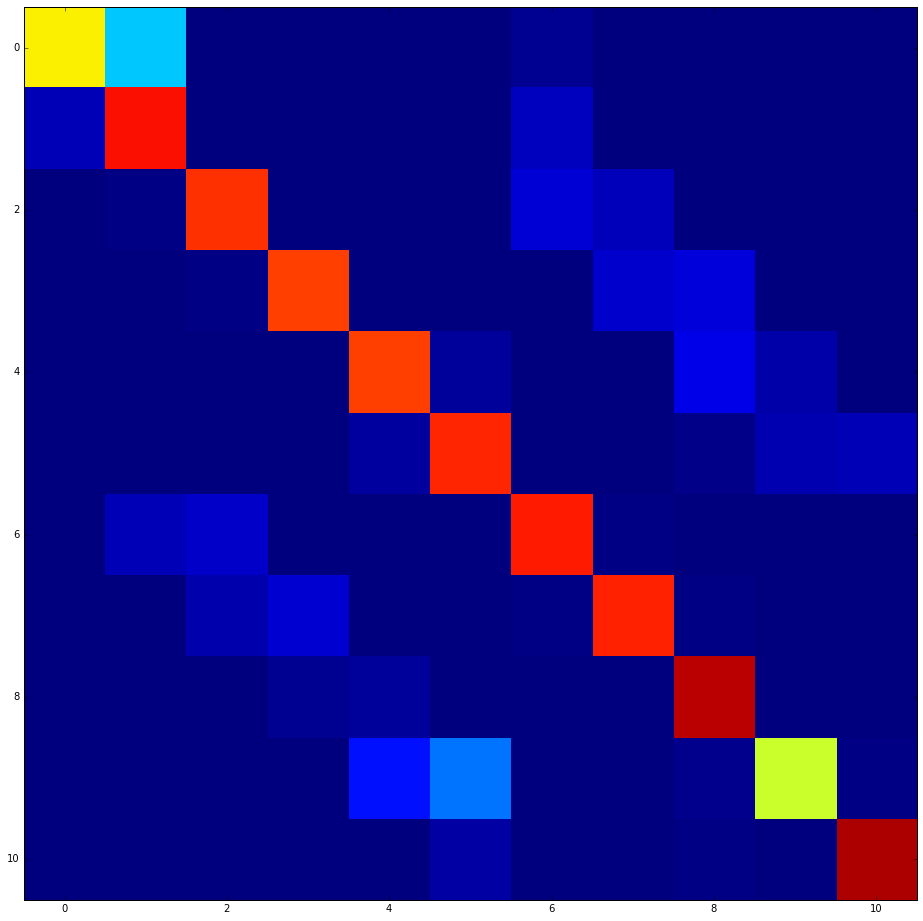

In [11]:
fig = plt.figure(figsize=(16,16))
plt.imshow(pur_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

In [13]:
print np.max(pur - pur_tracks)
print np.min(pur - pur_tracks)

0.152263282176
-0.167228965377


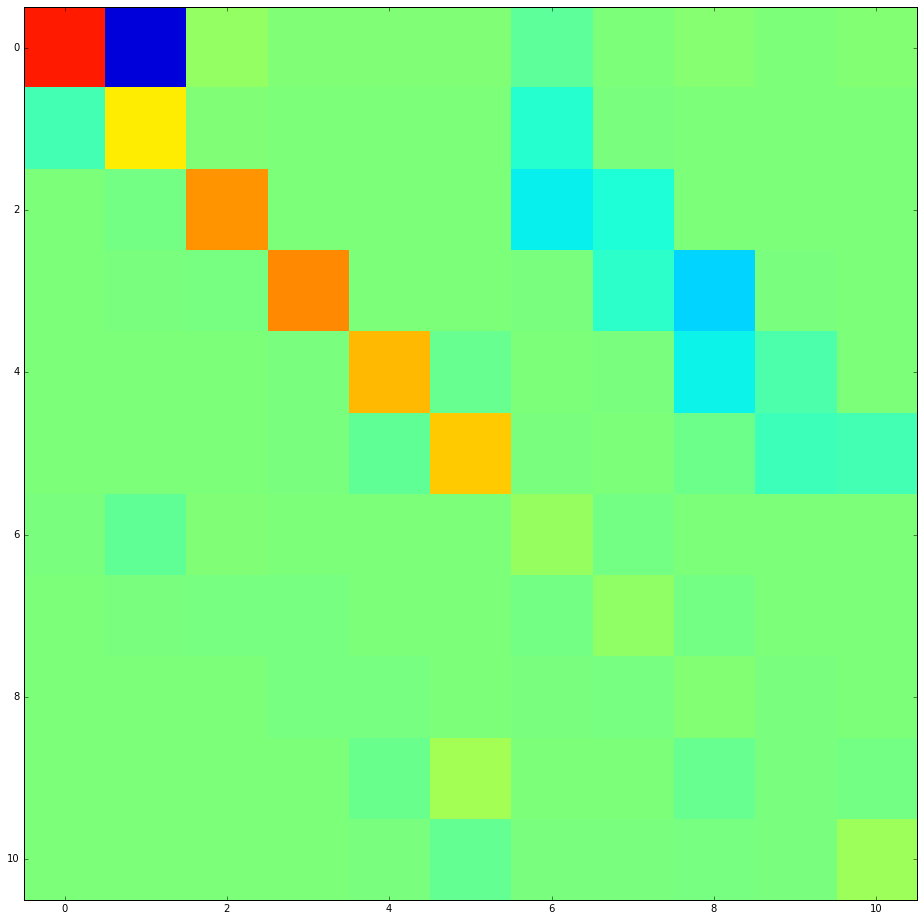

In [12]:
fig = plt.figure(figsize=(16,16))
plt.imshow(pur - pur_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=-0.2, vmax=0.2)

We column normalize (divide by `axis=0` to get the _efficiency_ - it is saying "okay, I have an event coming from target 1 (reading the "y-axis"), was it reconstructed in target 1?, etc. (reading along the x for a given y)"

In [14]:
eff = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    eff[:, i] = arr[:, i] / arr.sum(axis=0)[i]
    
eff_tracks = np.zeros_like(arr_tracks)
for i in range(np.shape(arr_tracks)[0]):
    eff_tracks[:, i] = arr_tracks[:, i] / arr_tracks.sum(axis=0)[i]

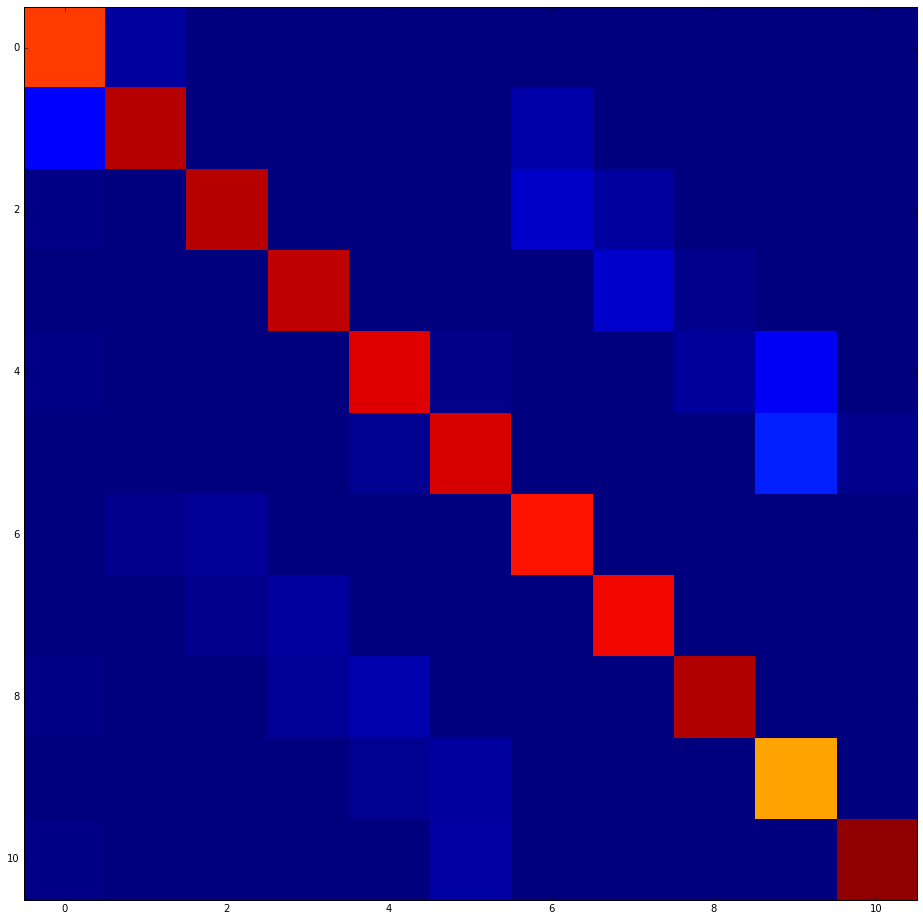

In [15]:
fig = plt.figure(figsize=(16,16))
plt.imshow(eff, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

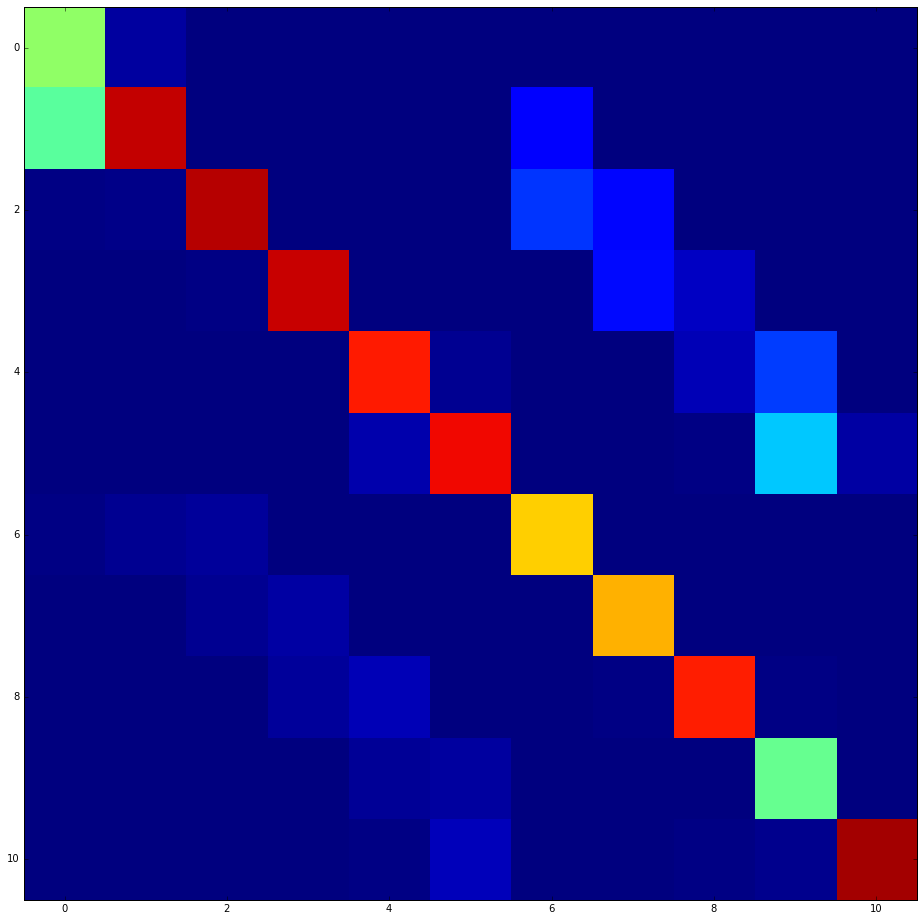

In [16]:
fig = plt.figure(figsize=(16,16))
plt.imshow(eff_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

In [17]:
print np.max(eff - eff_tracks)
print np.min(eff - eff_tracks)

0.322467090474
-0.335030856344


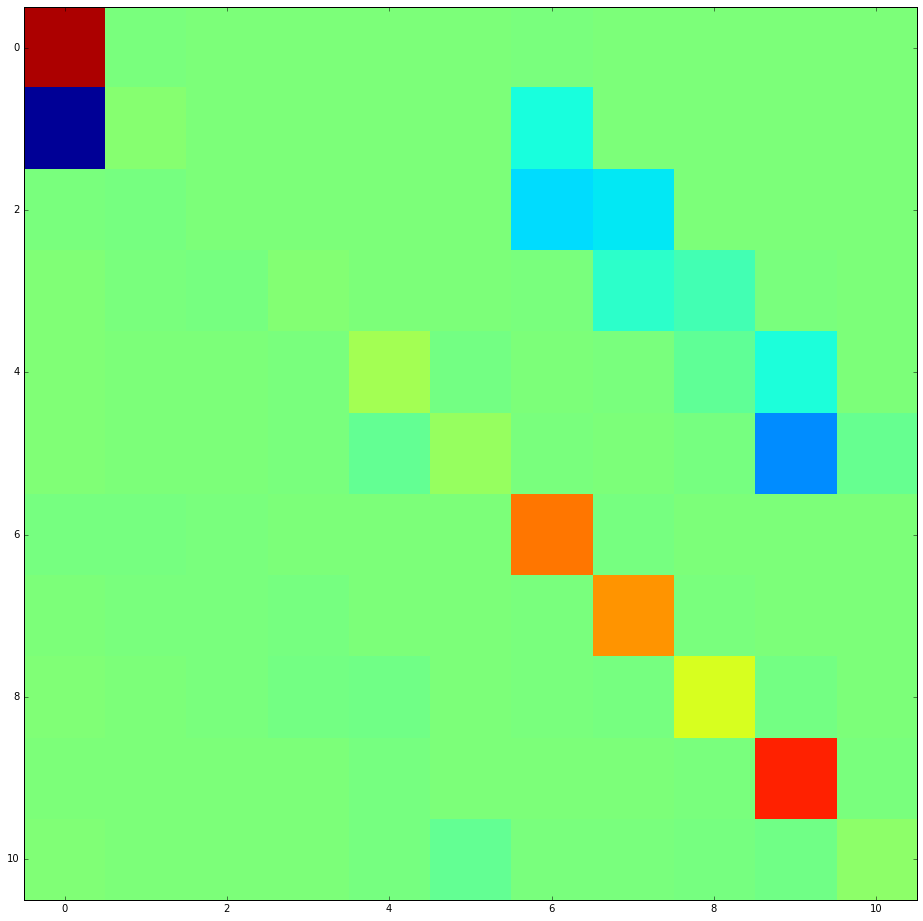

In [18]:
fig = plt.figure(figsize=(16,16))
plt.imshow(eff - eff_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=-0.35, vmax=0.35)